In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df = pd.read_csv("../00_datasets/gm_2008_region.csv")

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   population       139 non-null    float64
 1   fertility        139 non-null    float64
 2   HIV              139 non-null    float64
 3   CO2              139 non-null    float64
 4   BMI_male         139 non-null    float64
 5   GDP              139 non-null    float64
 6   BMI_female       139 non-null    float64
 7   life             139 non-null    float64
 8   child_mortality  139 non-null    float64
 9   Region           139 non-null    object 
dtypes: float64(9), object(1)
memory usage: 11.0+ KB


In [73]:
y = df['life'].values.reshape(-1, 1)
X_fertility = df['fertility'].values.reshape(-1, 1)

print(type(y), type(X_fertility))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


Text(0, 0.5, 'Life Expectancy')

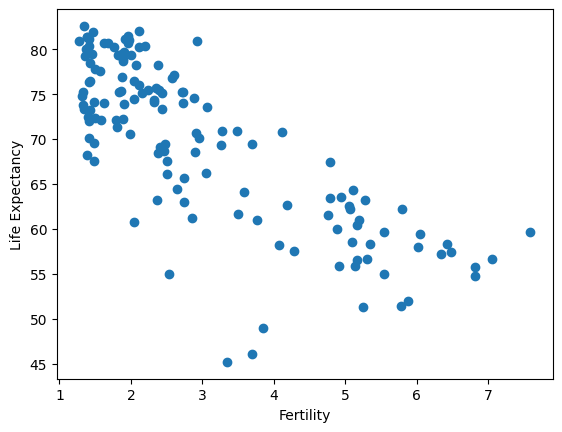

In [74]:
plt.scatter(X_fertility, y)
plt.xlabel("Fertility")
plt.ylabel("Life Expectancy")
# É possível verificar que há uma pesada correlação negativa entre Fertilidade e Expectativa de Vida.

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
reg = LinearRegression()

In [77]:
prediction_space = np.linspace(min(X_fertility), max(X_fertility))
print(prediction_space.shape)
prediction_space = prediction_space.reshape(-1, 1)
print(prediction_space.shape)
print(prediction_space)

(50, 1)
(50, 1)
[[1.28      ]
 [1.40877551]
 [1.53755102]
 [1.66632653]
 [1.79510204]
 [1.92387755]
 [2.05265306]
 [2.18142857]
 [2.31020408]
 [2.43897959]
 [2.5677551 ]
 [2.69653061]
 [2.82530612]
 [2.95408163]
 [3.08285714]
 [3.21163265]
 [3.34040816]
 [3.46918367]
 [3.59795918]
 [3.72673469]
 [3.8555102 ]
 [3.98428571]
 [4.11306122]
 [4.24183673]
 [4.37061224]
 [4.49938776]
 [4.62816327]
 [4.75693878]
 [4.88571429]
 [5.0144898 ]
 [5.14326531]
 [5.27204082]
 [5.40081633]
 [5.52959184]
 [5.65836735]
 [5.78714286]
 [5.91591837]
 [6.04469388]
 [6.17346939]
 [6.3022449 ]
 [6.43102041]
 [6.55979592]
 [6.68857143]
 [6.81734694]
 [6.94612245]
 [7.07489796]
 [7.20367347]
 [7.33244898]
 [7.46122449]
 [7.59      ]]


In [78]:
# Vamos treinar o modelo.
reg.fit(X_fertility, y)

LinearRegression()

In [83]:
# A gente vai dar uma olhada na acurácia do modelo já treinado.
print(reg.score(X_fertility, y))

0.6192442167740035


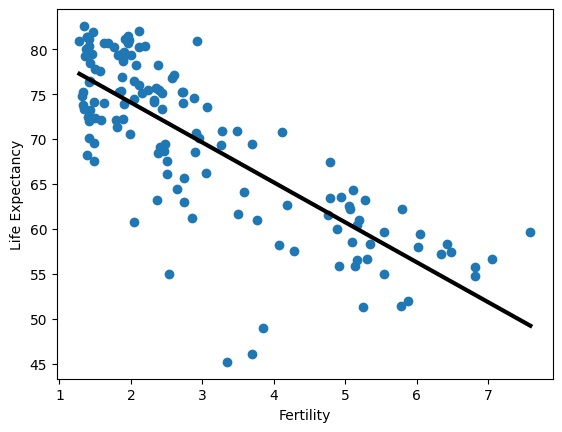

In [ ]:
# Bom, ele não é lá essas coisas. Mas vamos plotar e ver como ele se sai.
# Então vamos criar a linha da regressão. Para isso, precisamos do espaço de predição que criamos.
y_pred = reg.predict(prediction_space)

# E agora plotamos sobre o gráfico scatter com todas as amostras para comparar.
plt.scatter(X_fertility, y)
plt.xlabel("Fertility")
plt.ylabel("Life Expectancy")
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()